In [1]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import html

from sklearn.decomposition import PCA

# roodmus
from roodmus.analysis.utils import load_data
from roodmus.heterogeneity.plot_heterogeneous_reconstruction import (
    plot_latent_space_scatter
)

In [2]:
# functions
def get_latents_cryodrgn(latent_file):
    latents = np.load(latent_file, allow_pickle=True)
    ndim = latents.shape[1]
    return latents, ndim

In [12]:
# data loading for DE-Shaw covid spike partially open set
project_dir = "/home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated"
config_dir = os.path.join(project_dir, "Movies")
figures_dir = os.path.join(project_dir, "figures")
# meta_file = os.path.join(project_dir, "cryoDRGN", "run_data.star")
meta_file = "/home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/Refine3D/job027/run_data.star"
jobtypes = {
     # os.path.join(project_dir, "cryoDRGN", "run_data.star"): "cryoDRGN",
    "/home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/Refine3D/job027/run_data.star": "cryoDRGN",
}

# latent_file =  os.path.join(project_dir, "cryoDRGN", "train_320", "z.19.pkl")
latent_file =  os.path.join(project_dir, "cryoDRGN", "train_128", "z.24.pkl")

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True
ignore_missing_files = True
enable_tqdm = True

print(meta_file)
for file in meta_file:
    if file.endswith(".star"):
        print("is star")
    else:
        print("not star")
print(type(meta_file))

analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, enable_tqdm=enable_tqdm, ignore_missing_files=ignore_missing_files) # creates the class
df_picked = pd.DataFrame(analysis.results_picking)
df_truth = pd.DataFrame(analysis.results_truth)
df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)

# latent_space, ndim = IO.get_latents_cs(latent_file)
latent_space, ndim = get_latents_cryodrgn(latent_file)
print(f"latent space dimensionality: {ndim}")
print(latent_space.shape)
for i in range(ndim):
    df_picked["latent_{}".format(i)] = latent_space[:, i]

# perform PCA on latent space and add PCA coordinates to the dataframe
pca = PCA(n_components=ndim)
pca.fit(latent_space)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
latent_space_pca = pca.transform(latent_space)
for i in range(ndim):
    df_picked["PCA_{}".format(i)] = latent_space_pca[:, i]
df_picked.tail()

/home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/Refine3D/job027/run_data.star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not star
not 

loading truth data: 100%|██████████| 67/67 [00:18<00:00,  3.63it/s, micrograph=000066.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 15846 particles and 20100 true particles
Added 20100 particles from /home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/Movies
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 67
Number of micgrographs: 67
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 67/67 [00:03<00:00, 17.37it/s, precision=1, recall=0.858, multiplicity=0.867]    


time taken to compute precision: 3.8902790546417236
latent space dimensionality: 8
(15846, 8)
[0.30988628 0.14666761 0.11302192 0.09609826 0.09319971 0.0886042
 0.08286228 0.06965974]
[623.60394 429.0173  376.60754 347.26855 341.9912  333.45316 322.46762
 295.6641 ]


,metadata_filename,ugraph_filename,position_x,position_y,euler_phi,euler_theta,euler_psi,ugraph_shape,defocusU,defocusV,...,latent_6,latent_7,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
15841,/home/dvi41342/MapReconstruction/DESRES-Trajec...,000066.mrc,1036.0,3017.0,39.883235,43.569800,-133.30909,"(4000, 4000)",20675.521484,20610.615234,...,-1.310846,-1.236269,1.026876,-3.762261,0.778435,-0.382480,0.780765,-1.366444,-1.186033,-2.757785
15842,/home/dvi41342/MapReconstruction/DESRES-Trajec...,000066.mrc,3857.0,2618.0,19.452467,46.127761,74.380777,"(4000, 4000)",20675.521484,20610.615234,...,13.087350,-4.982880,12.372021,5.801825,1.591841,0.306469,-4.833311,-12.077583,12.620853,-4.676122
15843,/home/dvi41342/MapReconstruction/DESRES-Trajec...,000066.mrc,2240.0,3801.0,-74.68463,34.872931,-31.40229,"(4000, 4000)",20675.521484,20610.615234,...,0.230242,-4.098281,-5.133042,1.184995,0.970153,1.271259,1.633493,-0.978381,1.666855,0.752160
15844,/home/dvi41342/MapReconstruction/DESRES-Trajec...,000066.mrc,1883.0,3283.0,98.290212,92.846561,103.170985,"(4000, 4000)",20675.521484,20610.615234,...,3.163535,-4.926032,-3.797069,3.431421,-3.736067,0.933484,0.458421,-2.026828,2.611811,-0.975670
15845,/home/dvi41342/MapReconstruction/DESRES-Trajec...,000066.mrc,1533.0,2135.0,70.527599,83.846918,72.705250,"(4000, 4000)",20675.521484,20610.615234,...,-1.655131,-2.781292,-2.867061,0.711143,0.481930,-1.112168,0.649570,0.425138,0.295121,-1.023104


## FIG 4 Panel A (FP picks), 128 pixel ds

plotting latent space of epoch 25 of cryoDRGN with the FP particle picks plotted in red

number of FP: 27
number of TP: 15819


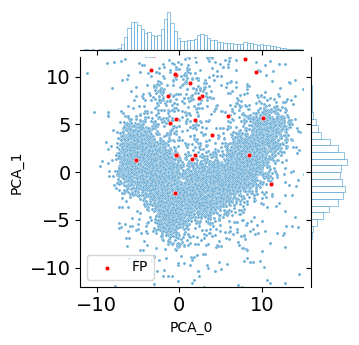

In [32]:
# latent space scatter plot
dim1=0
dim2=1

grid = plot_latent_space_scatter(
    df_picked,
    dim_1=dim1,
    dim_2=dim2,
    # color_by="TP", # "#4eb3d3",
    pca=True,
    palette="Set1"
)
df_FP = df_picked[df_picked["TP"]==0]
print(f"number of FP: {len(df_FP)}")
print(f"number of TP: {len(df_picked)-len(df_FP)}")
# ax = grid.fig.get_axes()[0] DEPRECATED, HAVENT FOUND REPLACEMENT YET
sns.scatterplot(
    data=df_FP,
    x=f"PCA_{dim1}",
    y=f"PCA_{dim2}",
    color="red",
    s=10,
    # ax=ax,
    label="FP",
)
# grid.set_axis_labels(f"PCA{dim1}", f"PCA{dim2}", fontsize=16)
grid.figure.get_axes()[0].tick_params(labelsize=14)
grid.figure.get_axes()[0].set_xlim((-12, 15))
grid.figure.get_axes()[0].set_ylim((-12, 12))

grid.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_pca_{dim1}_{dim2}_FP.pdf"), bbox_inches="tight")
grid.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_pca_{dim1}_{dim2}_FP.png"), bbox_inches="tight", dpi=600)


## FIG 4, Panel B (track MD trajectory through latent space), 128 

plot of the latent space with each point coloured by its corresponding frame from the MD trajectory

<Figure size 640x480 with 0 Axes>

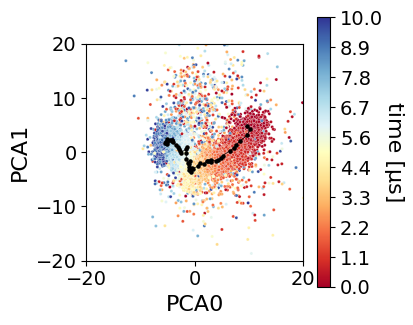

In [33]:
plt.clf()

# latent space scatter plot, coloured by ground truth frames
dim1=0
dim2=1
dt = 1.2e-3# time between frames in microseconds

fig, ax = plot_latent_space_scatter(
    df_picked,
    dim_1=dim1,
    dim_2=dim2,
    color_by="closest_pdb_index",
    palette="RdYlBu",
    pca=True,
)
# remove legend and add colorbar for the closest_pdb_index
ax.legend_.remove()

S_m = plt.cm.ScalarMappable(cmap="RdYlBu")
S_m.set_array(df_picked["closest_pdb_index"])
cbar = plt.colorbar(S_m)
cbar.set_label("time [\u03BCs]", rotation=270, labelpad=15, fontsize=16) # time in ps
# change the tick labels on the colorbar to go from 0 to 10 us
cbar.set_ticks(np.linspace(1, df_picked["closest_pdb_index"].max(), 10))
xticklabels = [np.round(r, 1) for r in np.linspace(1, df_picked["closest_pdb_index"].max(), 10)*dt]
cbar.set_ticklabels(xticklabels, fontsize=14)
ax.set_xlabel(f"PCA{dim1}", fontsize=16)
ax.set_ylabel(f"PCA{dim2}", fontsize=16)
ax.tick_params(labelsize=14)
#ax.set_xlim((-12, 16))
#ax.set_ylim((-12, 12))
ax.set_xlim((-20, 20))
ax.set_ylim((-20, 20))
#plt.xticks([-20,-10,0,10,20])
#plt.yticks([])

# add trajectory to the plot
N_volumes = 50
pdb_indices = np.unique(df_picked["closest_pdb_index"])
d_pdbs = len(pdb_indices) // N_volumes

trajectory = np.zeros((N_volumes, ndim))
trajectory_pca = np.zeros((N_volumes, ndim))
for i in range(N_volumes):
    pdb_group = pdb_indices[i*d_pdbs:(i+1)*d_pdbs]
    mean_latent = df_picked[df_picked["closest_pdb_index"].isin(pdb_group)].agg(
        {f"latent_{i}": "mean" for i in range(ndim)}
    )
    trajectory[i] = mean_latent.values
    mean_pca = df_picked[df_picked["closest_pdb_index"].isin(pdb_group)].agg(
        {f"PCA_{i}": "mean" for i in range(ndim)}
    )
    trajectory_pca[i] = mean_pca.values

ax.scatter(trajectory_pca[:, 0], trajectory_pca[:, 1], s=5, c="black", zorder=10)
ax.plot(trajectory_pca[:, 0], trajectory_pca[:, 1], c="black", zorder=10, linewidth=0.5)
ax.set_aspect("equal")

fig.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_latent_space_scatter_colored_by_closest_pdb_index_pca.png"), dpi=600, bbox_inches="tight")
fig.savefig(os.path.join(figures_dir, f"{os.path.basename(latent_file)}_latent_space_scatter_colored_by_closest_pdb_index_pca.pdf"), bbox_inches="tight")


## FIG 2A - Micrograph, PS thumbnail and radially averaged PS 

In [35]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mrcfile

# from emmer.ndimage.filter.smoothen_mask import smoothen_mask
from pipeliner.mrc_image_tools import mrc_thumbnail
# from gemmi import cif

# roodmus
from roodmus.analysis.utils import load_data

<Figure size 640x480 with 0 Axes>

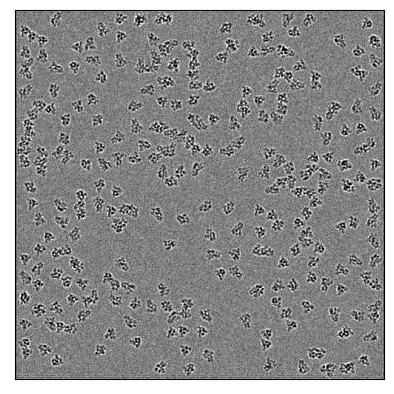

In [47]:
plt.clf()
from pipeliner.mrc_image_tools import mrc_thumbnail
# load the input micrograph and plot a thumbnail
project_dir = "/home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated"
figures_dir = os.path.join(project_dir, "figures")
input_mrc_filename = os.path.join(project_dir, "MotionCorr", "job007", "Movies", "000000.mrc")
input_mrc_thumbnail = mrc_thumbnail(
    input_mrc_filename,
    500,
    os.path.join(figures_dir, "motioncorr_ugraph_000000.png"),
)

fig, ax = plt.subplots()
ax.imshow(input_mrc_thumbnail, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(figures_dir, "motioncorr_ugraph_000000.png"), dpi=600, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

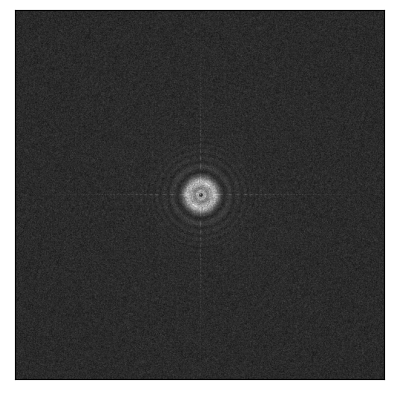

In [48]:
plt.clf()
# plot the power specrtrum
from pipeliner.mrc_image_tools import mrc_thumbnail
diagnostic_filename = os.path.join(project_dir, "CtfFind", "job008", "Movies", "000000_PS.mrc")
mrc_PS = mrc_thumbnail(
    diagnostic_filename,
    500,
    os.path.join(figures_dir, "PS_ugraph_000000.png"),
)

fig, ax = plt.subplots()
ax.imshow(mrc_PS, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
fig.savefig(os.path.join(figures_dir, "PS_ugraph_000000.png"), dpi=600, bbox_inches="tight")

## FIG 1A - LocalRes and FSC

In [49]:
# imports
import os
import mrcfile
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from gemmi import cif

# roodmus
from roodmus.analysis.utils import load_data

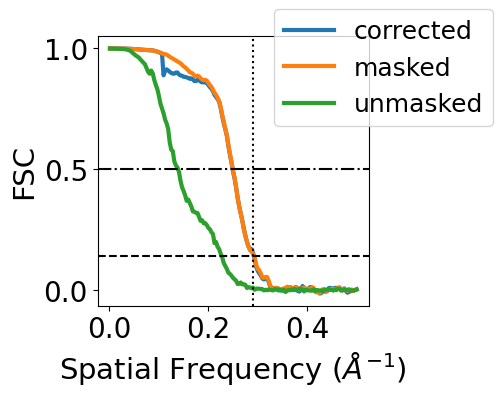

In [58]:
project_dir = "/home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated"
figures_dir = os.path.join(project_dir, "figures")
job = "job029"
fsc_postprocess_filename = os.path.join(project_dir, "PostProcess", job, "postprocess.star")
resolution = 3.44


fsc_cif = cif.read(fsc_postprocess_filename).find_block("fsc")
rlnResolution = fsc_cif.find_loop("_rlnResolution")
rlnFourierShellCorrelationCorrected = fsc_cif.find_loop("_rlnFourierShellCorrelationCorrected")
rlnFourierShellCorrelationParticleMaskFraction = fsc_cif.find_loop("_rlnFourierShellCorrelationParticleMaskFraction")
rlnFourierShellCorrelationUnmaskedMaps = fsc_cif.find_loop("_rlnFourierShellCorrelationUnmaskedMaps")
rlnFourierShellCorrelationMaskedMaps = fsc_cif.find_loop("_rlnFourierShellCorrelationMaskedMaps")
rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps = fsc_cif.find_loop("_rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps")

df = pd.DataFrame({
    "resolution": rlnResolution,
    "fsc": rlnFourierShellCorrelationCorrected,
    "fsc_masked": rlnFourierShellCorrelationMaskedMaps,
    "fsc_unmasked": rlnFourierShellCorrelationUnmaskedMaps,
    "fsc_masked_random": rlnCorrectedFourierShellCorrelationPhaseRandomizedMaskedMaps,
    "fsc_masked_fraction": rlnFourierShellCorrelationParticleMaskFraction,
})

# convert all columns to float
for column in df.columns:
    df[column] = df[column].astype(float)

fig, ax = plt.subplots(figsize=(3.5, 3.5))
sns.lineplot(x="resolution", y="fsc", data=df, ax=ax, legend=True, label="corrected", linewidth=3)
sns.lineplot(x="resolution", y="fsc_masked", data=df, ax=ax, legend=True, label="masked", linewidth=3)
sns.lineplot(x="resolution", y="fsc_unmasked", data=df, ax=ax, legend=True, label="unmasked", linewidth=3)
ax.axhline(0.143, color="black", linestyle="--")
ax.axhline(0.5, color="black", linestyle="-.")
ax.axvline(1/resolution, color="black", linestyle="dotted")
ax.set_xlabel("Spatial Frequency ($\AA^{-1}$)", fontsize=21)
ax.set_ylabel("FSC", fontsize=21)
# ax.set_ylim((-0.1, 1.25))
# change the fontsize of the ticks and the legend
ax.tick_params(axis='both', which='major', labelsize=20)
ax.legend(fontsize=18, bbox_to_anchor=(0.65, 1.1), loc=2, borderaxespad=0.)
fig.savefig(os.path.join(figures_dir, f"{job}_FSC.pdf"), bbox_inches="tight")
fig.savefig(os.path.join(figures_dir, f"{job}_FSC.png"), bbox_inches="tight", dpi=600)

## FIG 1F - Precision and Recall

In [59]:
project_dir = "/home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated"
config_dir = os.path.join(project_dir, "Movies")
figures_dir = os.path.join(project_dir, "figures")
meta_files = [
    os.path.join(project_dir, "Extract", "job013", "particles.star"),
    os.path.join(project_dir, "Class2D", "job014", "run_it200_data.star"),
    os.path.join(project_dir, "Select", "job020", "particles.star"),
    os.path.join(project_dir, "Select", "job041", "particles.star"),
    os.path.join(project_dir, "Select", "job042", "particles.star"),
    os.path.join(project_dir, "Select", "job043", "particles.star"),
    os.path.join(project_dir, "Select", "job044", "particles.star"),
    # os.path.join(project_dir, "Refine3D", "job014", "run_it015_data.star"),
    # os.path.join(project_dir, "Refine3D", "job020", "run_it017_data.star"),
    # os.path.join(project_dir, "Refine3D", "job008", "run_it011_data.star"),
]

jobtypes = {
    os.path.join(project_dir, "Extract", "job013", "particles.star"): "topaz picker",
    os.path.join(project_dir, "Class2D", "job014", "run_it200_data.star"): "2D classification",
    os.path.join(project_dir, "Select", "job020", "particles.star"): "2D class selection",
    os.path.join(project_dir, "Select", "job041", "particles.star"): "3D class 0",
    os.path.join(project_dir, "Select", "job042", "particles.star"): "3D class 1",
    os.path.join(project_dir, "Select", "job043", "particles.star"): "3D class 2",
    os.path.join(project_dir, "Select", "job044", "particles.star"): "3D class 3",
    # os.path.join(project_dir, "Refine3D", "job014", "run_it015_data.star"): "Homogeneous refinement 1",
    # os.path.join(project_dir, "Refine3D", "job020", "run_it017_data.star"): "Homogeneous refinement 2",
    # os.path.join(project_dir, "Refine3D", "job008", "run_it011_data.star"): "Homogeneous refinement 3",
}

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True # prints out progress statements
ignore_missing_files = True # if .mrc files are missing, the analysis will still be performed
enable_tqdm = True # enables tqdm progress bars

for i, meta_file in enumerate(meta_files):
    if i == 0:
        analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, enable_tqdm=enable_tqdm, ignore_missing_files=ignore_missing_files) # creates the class
    else:
        analysis.add_data(meta_file, config_dir, verbose=verbose) # updates the class with the next metadata file
    
df_picked = pd.DataFrame(analysis.results_picking)
df_truth = pd.DataFrame(analysis.results_truth)
df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)
print(f"mean precision: {df_precision['precision'].mean()}")
print(f"mean recall: {df_precision['recall'].mean()}")

loading metadata from /home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/Extract/job013/particles.star...
loaded metadata from /home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/Extract/job013/particles.star. determined file type: star


Dictionaries now contain 17501 reconstructed particles
added 17501 particles from /home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/Extract/job013/particles.star


loading truth data: 100%|██████████| 67/67 [00:19<00:00,  3.49it/s, micrograph=000066.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 17501 particles and 20100 true particles
Added 20100 particles from /home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/Movies
loading metadata from /home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/Class2D/job014/run_it200_data.star...
loaded metadata from /home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/Class2D/job014/run_it200_data.star. determined file type: star
checking if ugraphs exist...


Dictionaries now contain 35002 reconstructed particles
added 17501 particles from /home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/Class2D/job014/run_it200_data.star
loading metadata from /home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/Select/job020/particles.star...
loaded metadata from /home/dvi41

computing precision: 100%|██████████| 469/469 [00:17<00:00, 26.24it/s, precision=1, recall=0.22, multiplicity=0.23]      


time taken to compute precision: 18.138648748397827
mean precision: 0.9952617416568891
mean recall: 0.5052637739298599


/tmp/ipykernel_153676/1497854792.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
/tmp/ipykernel_153676/1497854792.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


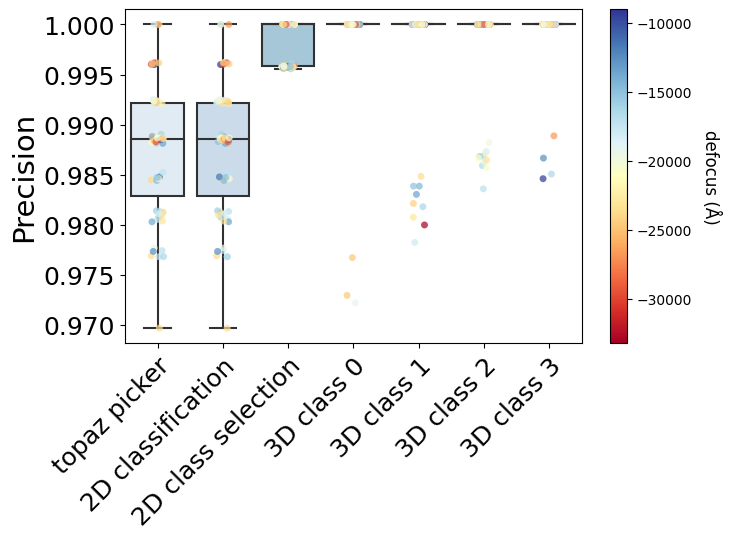

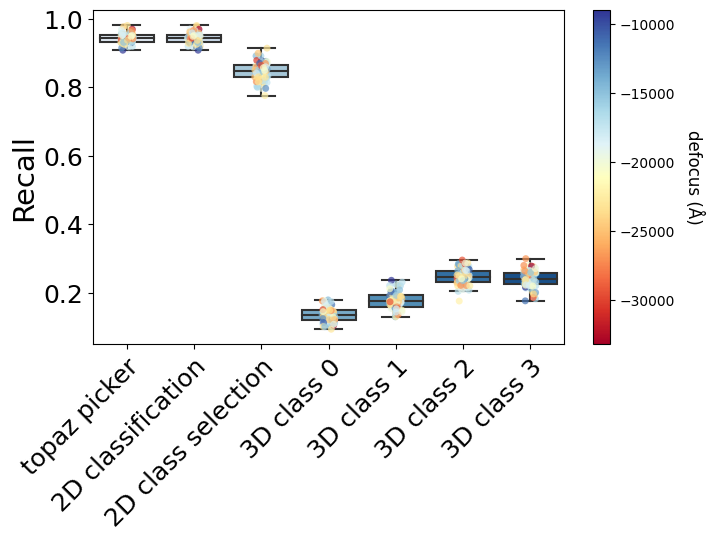

In [60]:
from importlib import reload
import roodmus.analysis.plot_picking
reload(roodmus.analysis.plot_picking)
from roodmus.analysis.plot_picking import (
    plot_precision, plot_recall,
)

order = []
for r in meta_files:
    if type(r) == str:
        order.append(r)
    else:
        order.append(r[0])  
fig, ax = plot_precision(df_precision, jobtypes, order)
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(xticklabels, fontsize=12)
ax.set_title("")
fig.set_size_inches(7, 7)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
ax.set_ylabel("Precision", fontsize=21)

fig.savefig(os.path.join(figures_dir, "precision.pdf"), bbox_inches="tight")
fig.savefig(os.path.join(figures_dir, "precision.png"), bbox_inches="tight", dpi=600)

fig, ax = plot_recall(df_precision, jobtypes, order)
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(xticklabels, fontsize=12)
ax.set_title("")
fig.set_size_inches(7, 7)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
ax.set_ylabel("Recall", fontsize=21)

fig.savefig(os.path.join(figures_dir, "recall.pdf"), bbox_inches="tight")
fig.savefig(os.path.join(figures_dir, "recall.png"), bbox_inches="tight", dpi=600)

## Get LocalRes Spread

mean rad dmg dataset: 3.33144211769104
variance rad dmg dataset: 1.5853596925735474


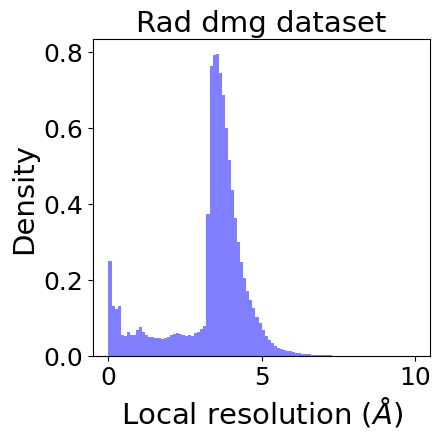

In [54]:
# rad dmg dataset
locres_sc_file = "/home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/LocalRes/job039/relion_locres.mrc"
mask_sc_file = "/home/dvi41342/MapReconstruction/DESRES-Trajectory_sarscov2-11021571-all-glueCA_fractionated/MaskCreate/job034/mask.mrc"

# load the mrc files
locres_sc = mrcfile.open(locres_sc_file, mode='r')
mask_sc = mrcfile.open(mask_sc_file, mode='r')
locres_sc_data = locres_sc.data * mask_sc.data
locres_sc_data[locres_sc_data == 0] = np.nan

# plot the local resolution
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
ax.hist(locres_sc_data.flatten(), bins=100, range=(0, 10), density=True, color="blue", alpha=0.5);
ax.set_xlabel("Local resolution ($\AA$)", fontsize=21)
ax.set_ylabel("Density", fontsize=21)
ax.set_title("Rad dmg dataset", fontsize=21)
ax.tick_params(axis='both', which='major', labelsize=18)

fig.tight_layout()

# print the mean and variance of the local resolution
print(f"mean rad dmg dataset: {np.nanmean(locres_sc_data)}")
print(f"variance rad dmg dataset: {np.nanvar(locres_sc_data)}")
